In [1]:
from dendron import *
from dendron.actions.image_lm_action import ImageLMActionConfig, ImageLMAction

from PIL import Image
import requests

In [2]:
cfg = ImageLMActionConfig(load_in_4bit=True,
                          max_new_tokens=70,
                          do_sample=True,
                          top_p=0.95,
                          device="cuda",
                          use_flash_attn_2=True,
                          model_name="llava-hf/llava-1.5-13b-hf")

In [3]:
node = ImageLMAction("ilm_action", cfg)
tree = BehaviorTree("image-ml-tree", node)

You are attempting to use Flash Attention 2.0 without specifying a torch dtype. This might lead to unexpected behaviour


Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


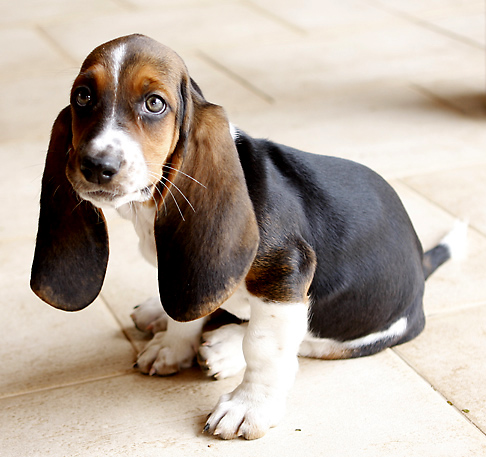

In [4]:
url = "https://upload.wikimedia.org/wikipedia/commons/a/af/Cara_de_quem_caiu_do_caminh%C3%A3o..._%28cropped%29.jpg"
img = Image.open(requests.get(url, stream=True).raw)
img

In [5]:
prompt_template = "USER: <image>\n{query}\nASSISTANT:"

In [6]:
import re

def trunc(node):
    out_str = node.blackboard[node.output_key]
    m = re.search(r'ASSISTANT:(.*)', out_str, re.DOTALL)
    node.blackboard[node.output_key] = m.group(1).strip()

tree.root.set_post_tick(trunc)

In [7]:
tree.blackboard_set("text_in", prompt_template.format(query="What kind of puppy is this? Is this a basset hound? Give a short answer."))
tree.blackboard_set("image_in", img)

In [8]:
status = tree.tick_once()

/home/richard/.conda/envs/test_dendron/lib/python3.11/site-packages/bitsandbytes/nn/modules.py:226: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_type=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(f'Input type into Linear4bit is torch.float16, but bnb_4bit_compute_type=torch.float32 (default). This will lead to slow inference or training speed.')


In [9]:
if status == NodeStatus.SUCCESS:
    print(tree.blackboard["out"])

Yes, this is a basset hound puppy.


In [10]:
tree.pretty_print()

Action ilm_action
